# We can predict

Forecast hourly power consumption for the next day
Forecast daily power consumption for the next week
Forecast weekly power consumption for the next month
Forecast monthly power consumption for the next year
input-frequency -----> output

[week1] ------> next week

[monthly] --------> next month

[yearly] ------------> next year

[daily] ---------> next day

we can also do multistep ahead prediction [input week1] ----> week2 -----> week3 ---- >

In [17]:
import pandas as pd

path = r"C:\Users\Andrew\Documents\Project\Time Series\Kepco-Search\dataset\Household_power_consumption\household_power_consumption.txt"
df = pd.read_csv(path, sep=';',
                 parse_dates={'dt': ['Date', 'Time']},
                 infer_datetime_format=True,
                 low_memory=False, na_values=['nan', '?'],
                 index_col='dt')

In [18]:
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
dt,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [19]:
df.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06
mean,1.091615e+00,1.237145e-01,2.408399e+02,4.627759e+00,1.121923e+00,1.298520e+00,6.458447e+00
std,1.057294e+00,1.127220e-01,3.239987e+00,4.444396e+00,6.153031e+00,5.822026e+00,8.437154e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.080000e-01,4.800000e-02,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,6.020000e-01,1.000000e-01,2.410100e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,1.528000e+00,1.940000e-01,2.428900e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01


In [38]:
# Add columns with year, month, and weekday name
df['Year'] = df.index.year
df['Month'] = df.index.month
# Display a random sampling of 5 rows
df.sample(5, random_state=0)

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Year,Month
dt,,,,,,,,,
2008-03-30 21:12:00,3.112,0.000,236.63,13.2,1.0,0.0,17.0,2008,3
2010-04-29 09:29:00,2.210,0.246,239.55,9.2,0.0,1.0,18.0,2010,4
2009-07-31 00:05:00,0.666,0.078,242.29,2.8,0.0,0.0,0.0,2009,7
2010-06-02 09:08:00,1.292,0.058,238.26,5.4,0.0,1.0,18.0,2010,6
2007-01-25 21:13:00,1.964,0.076,242.06,8.2,0.0,0.0,18.0,2007,1


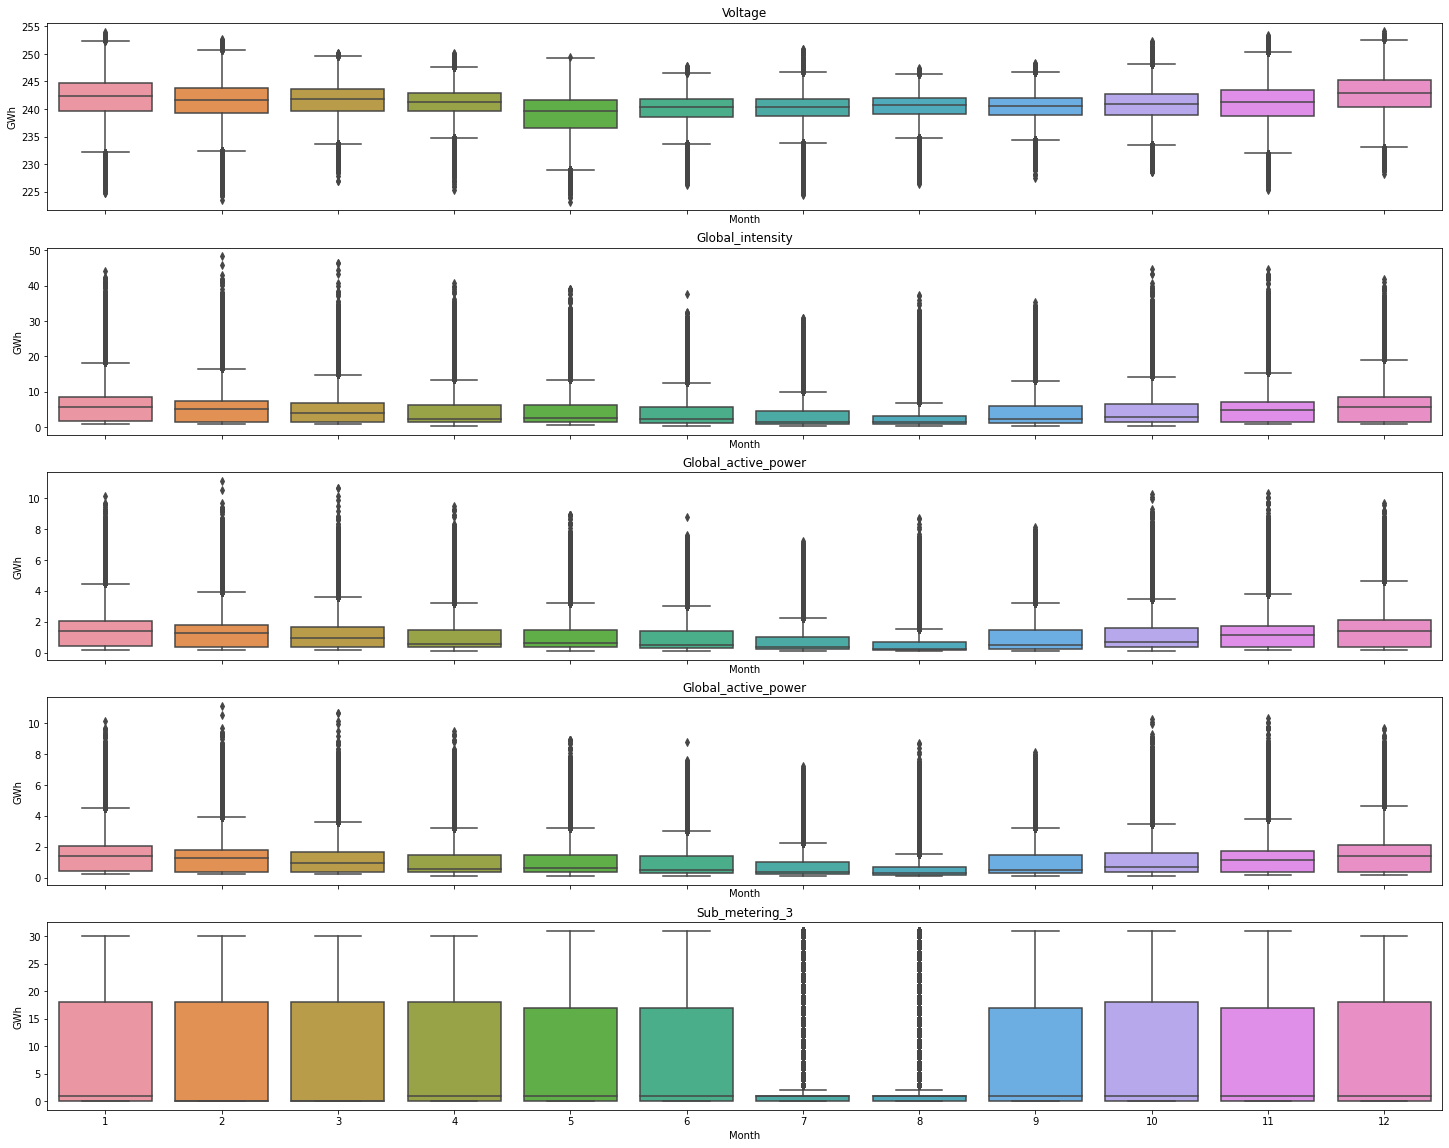

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
observation_col = [ 'Voltage',
 'Global_intensity',
 'Global_active_power',
 'Global_active_power',
 'Sub_metering_3']
fig, axes = plt.subplots(5, 1, figsize=(25, 20), sharex=True)
for name, ax in zip(observation_col, axes):
    sns.boxplot(data=df, x='Month', y=name, ax=ax)
    ax.set_ylabel('GWh')
    ax.set_title(name)
# Remove the automatic x-axis label from all but the bottom subplot
if ax != axes[-1]:
    ax.set_xlabel('')

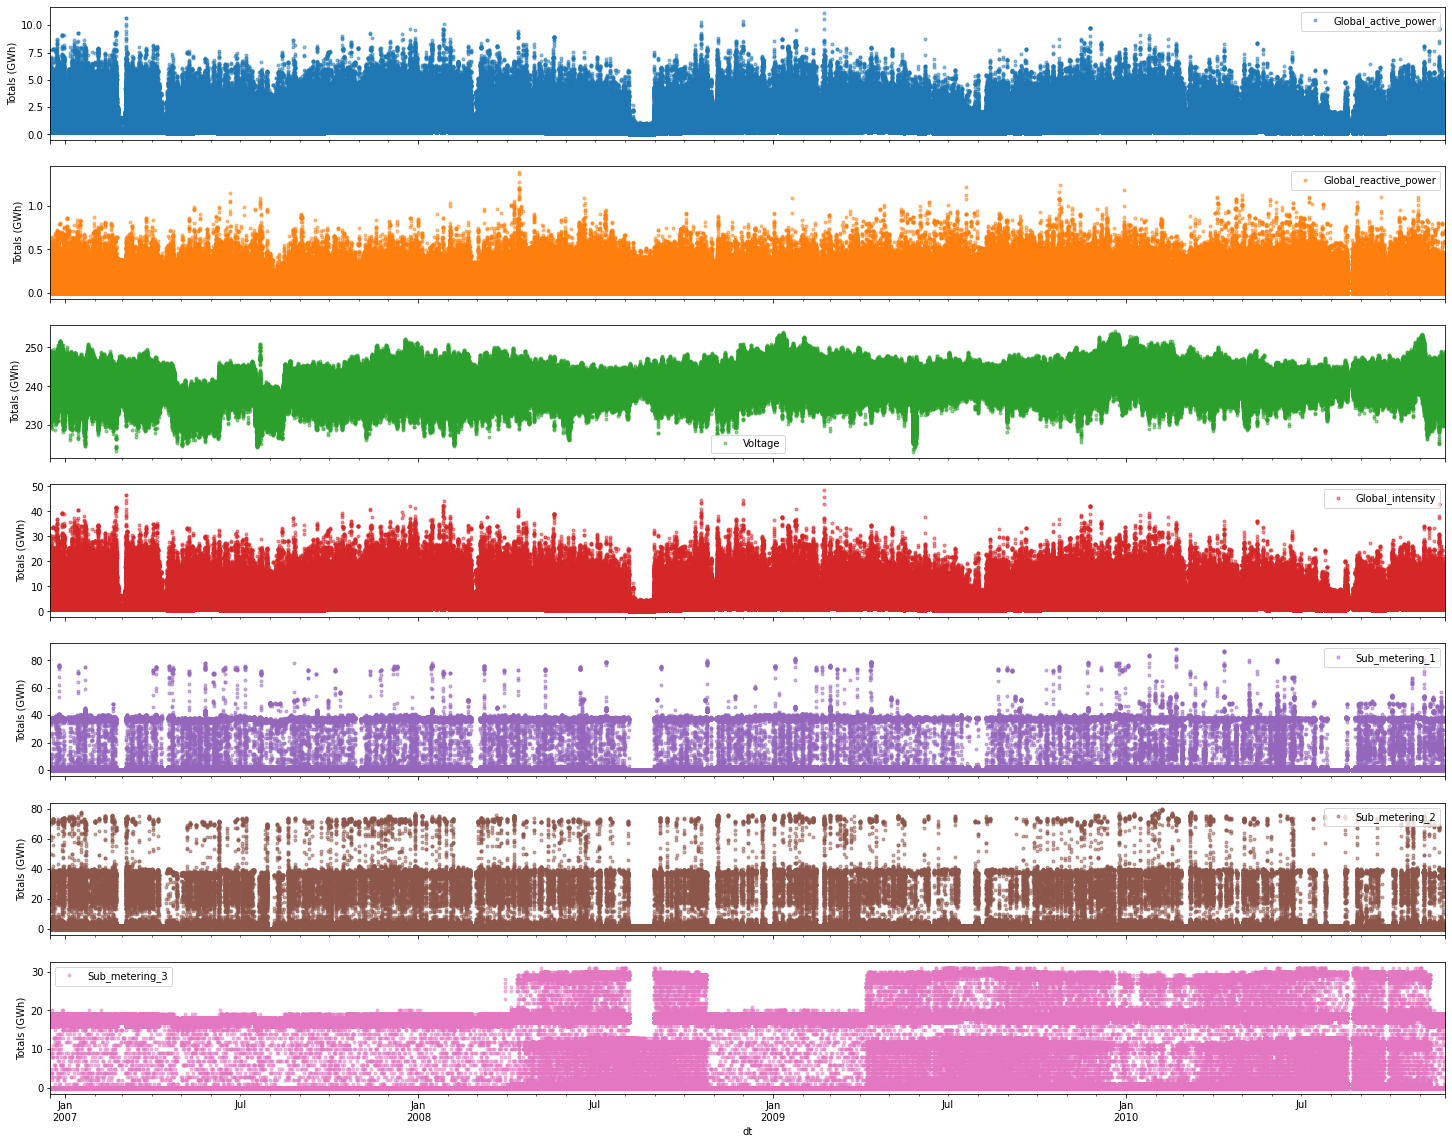

In [32]:
cols_plot = ['Global_active_power', 'Global_active_power']
list(df.columns.values)
axes = df[list(df.columns.values)].plot(marker='.', alpha=0.5, linestyle='None', figsize=(25, 20), subplots=True)
for ax in axes:
    ax.set_ylabel('Totals (GWh)')

In [13]:
corrmat = df.corr()
corrmat

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Global_active_power,1.000000,0.247017,-0.399762,0.998889,0.484401,0.434569,0.638555
Global_reactive_power,0.247017,1.000000,-0.112246,0.266120,0.123111,0.139231,0.089617
Voltage,-0.399762,-0.112246,1.000000,-0.411363,-0.195976,-0.167405,-0.268172
Global_intensity,0.998889,0.266120,-0.411363,1.000000,0.489298,0.440347,0.626543
Sub_metering_1,0.484401,0.123111,-0.195976,0.489298,1.000000,0.054721,0.102571
Sub_metering_2,0.434569,0.139231,-0.167405,0.440347,0.054721,1.000000,0.080872
Sub_metering_3,0.638555,0.089617,-0.268172,0.626543,0.102571,0.080872,1.000000


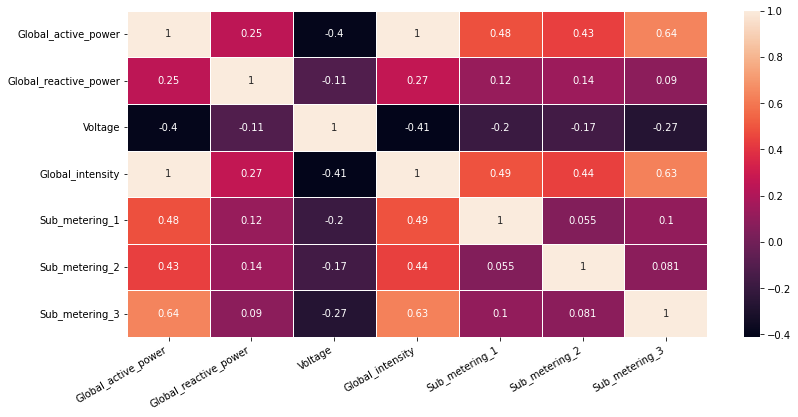

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(13, 6))
sns.heatmap(corrmat, vmax=1, annot=True, linewidths=.5)
plt.xticks(rotation=30, horizontalalignment='right')
plt.show()

In [3]:
droping_list_all = []
for j in range(0, 7):
    if not df.iloc[:, j].notnull().all():
        droping_list_all.append(j)

In [4]:
for j in range(0, 7):
    df.iloc[:, j] = df.iloc[:, j].fillna(df.iloc[:, j].mean())

In [5]:
df

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
dt,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0
...,...,...,...,...,...,...,...
2010-11-26 20:58:00,0.946,0.000,240.43,4.0,0.0,0.0,0.0
2010-11-26 20:59:00,0.944,0.000,240.00,4.0,0.0,0.0,0.0
2010-11-26 21:00:00,0.938,0.000,239.82,3.8,0.0,0.0,0.0


In [6]:
df.shape

(2075259, 7)

In [7]:
import numpy as np


# filling missing values by the value of one day before
def fill_missing(data):
    one_day = 23 * 60
    for row in range(data.shape[0]):
        for col in range(data.shape[1]):
            if np.isnan(data[row, col]):
                data[row, col] = data[row - one_day, col]

In [9]:
fill_missing(df.values)

df.isna().sum()  # no nan values

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [2]:
data = df.resample('D').sum()  #all the units of particular day

In [1]:
df

NameError: name 'df' is not defined

In [3]:
data

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
dt,,,,,,,
2006-12-16,1209.176,34.922,93552.53,5180.8,0.0,546.0,4926.0
2006-12-17,3390.460,226.006,345725.32,14398.6,2033.0,4187.0,13341.0
2006-12-18,2203.826,161.792,347373.64,9247.2,1063.0,2621.0,14018.0
2006-12-19,1666.194,150.942,348479.01,7094.0,839.0,7602.0,6197.0
2006-12-20,2225.748,160.998,348923.61,9313.0,0.0,2648.0,14063.0
...,...,...,...,...,...,...,...
2010-11-22,2041.536,142.354,345883.85,8660.4,4855.0,2110.0,10136.0
2010-11-23,1577.536,137.450,346428.76,6731.2,1871.0,458.0,7611.0
2010-11-24,1796.248,132.460,345644.59,7559.4,1096.0,2848.0,12224.0


## Save the csv data

In [5]:
data.to_csv("household_daily_power_consumption.csv", index=True)

In [9]:
df_csv = pd.read_csv("household_daily_power_consumption.csv")
df_csv.set_index('dt', inplace=True)
df_csv

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
dt,,,,,,,
2006-12-16,1209.176,34.922,93552.53,5180.8,0.0,546.0,4926.0
2006-12-17,3390.460,226.006,345725.32,14398.6,2033.0,4187.0,13341.0
2006-12-18,2203.826,161.792,347373.64,9247.2,1063.0,2621.0,14018.0
2006-12-19,1666.194,150.942,348479.01,7094.0,839.0,7602.0,6197.0
2006-12-20,2225.748,160.998,348923.61,9313.0,0.0,2648.0,14063.0
...,...,...,...,...,...,...,...
2010-11-22,2041.536,142.354,345883.85,8660.4,4855.0,2110.0,10136.0
2010-11-23,1577.536,137.450,346428.76,6731.2,1871.0,458.0,7611.0
2010-11-24,1796.248,132.460,345644.59,7559.4,1096.0,2848.0,12224.0


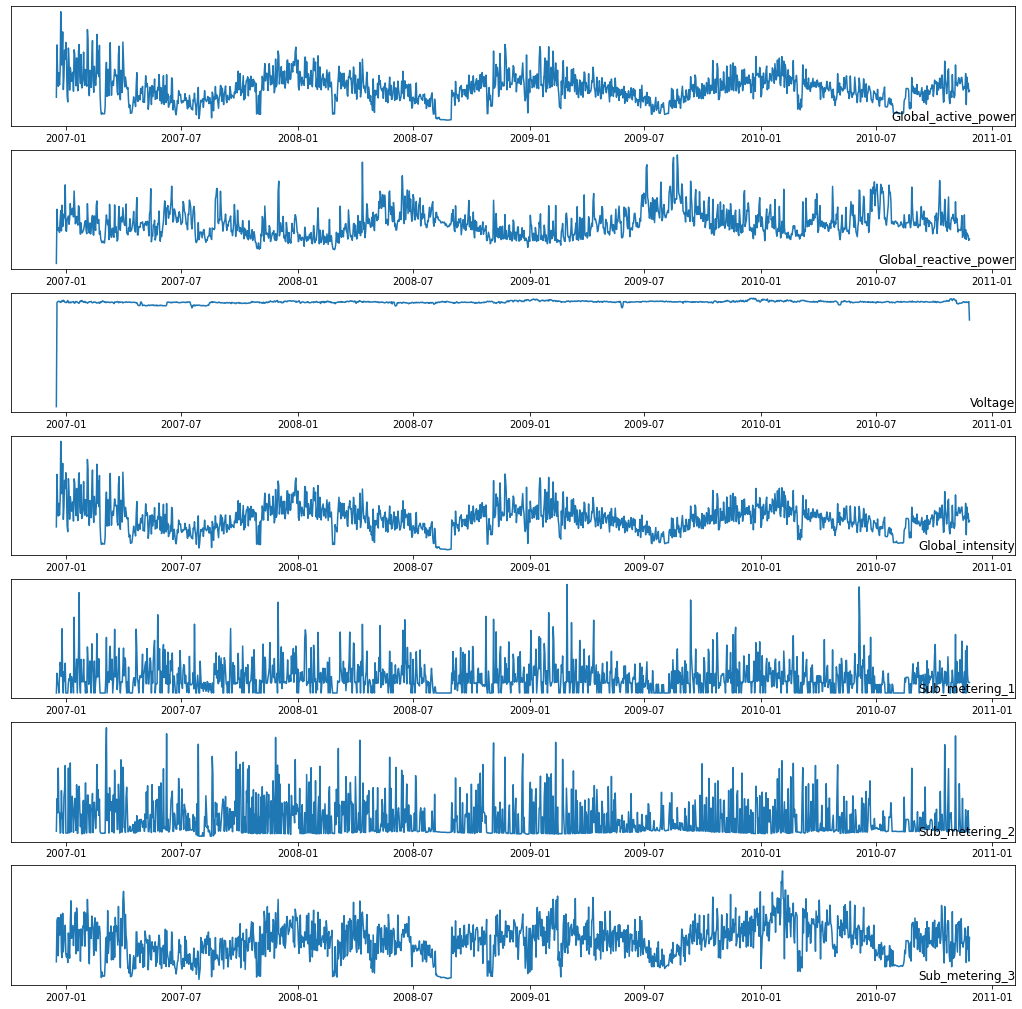

In [15]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots(figsize=(18, 18))
for i in range(len(data.columns)):
    plt.subplot(len(data.columns), 1, i + 1)
    name = data.columns[i]
    plt.plot(data[name])
    plt.title(name, y=0, loc='right')
    plt.yticks([])
plt.show()
fig.tight_layout()

C:\Users\Andrew\AppData\Local\Temp/ipykernel_6856/4054373210.py:8: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  active_power_data = data[str(year)]['Global_active_power']


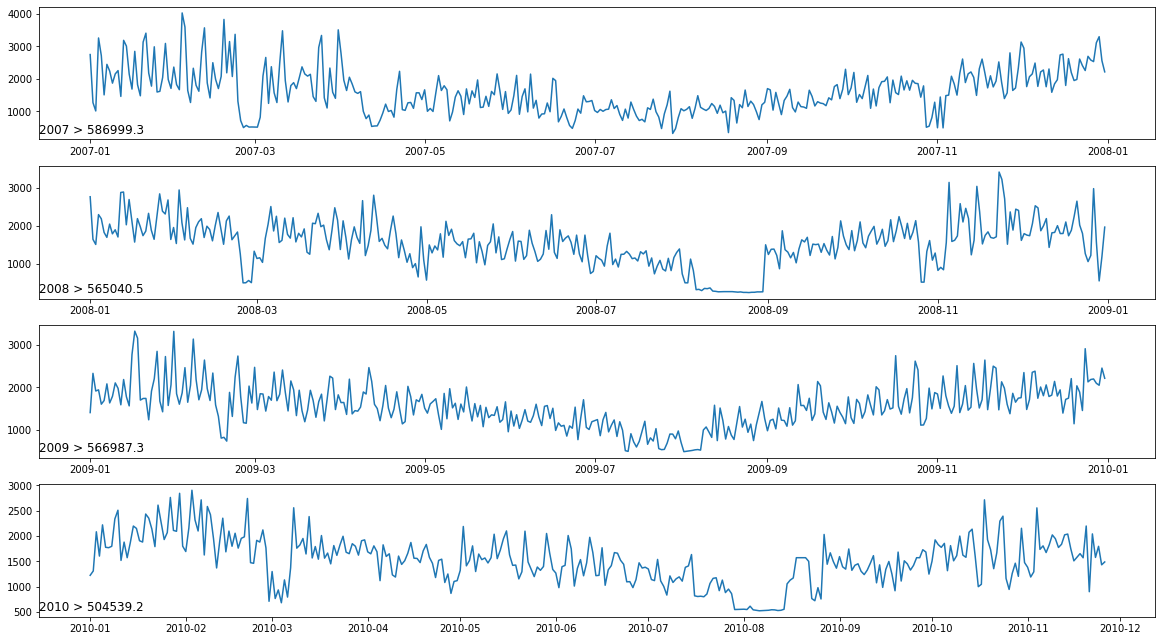

In [16]:
# now lets plot the active power per year
years = ['2007', '2008', '2009', '2010']
fig, ax = plt.subplots(figsize=(20, 20))

for i in range(len(years)):
    plt.subplot(len(data.columns), 1, i + 1)
    year = years[i]
    active_power_data = data[str(year)]['Global_active_power']
    plt.plot(active_power_data)
    plt.title(str(year) + " > " + str(np.round(active_power_data.sum(), 1)), y=0, loc='left')
plt.show()
fig.tight_layout()

In [19]:
data['2006']

C:\Users\Andrew\AppData\Local\Temp/ipykernel_6856/2461987659.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  data['2006']


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
dt,,,,,,,
2006-12-16,1209.17600,34.922000,93552.530000,5180.800000,0.000000,546.00000,4926.000000
2006-12-17,3390.46000,226.006000,345725.320000,14398.600000,2033.000000,4187.00000,13341.000000
2006-12-18,2203.82600,161.792000,347373.640000,9247.200000,1063.000000,2621.00000,14018.000000
2006-12-19,1666.19400,150.942000,348479.010000,7094.000000,839.000000,7602.00000,6197.000000
2006-12-20,2225.74800,160.998000,348923.610000,9313.000000,0.000000,2648.00000,14063.000000
2006-12-21,1718.80723,144.413429,347097.989716,7247.855519,1767.243847,2625.59704,10433.916895
2006-12-22,2341.33800,186.906000,347305.750000,9897.000000,3151.000000,350.00000,11131.000000
2006-12-23,4773.38600,221.470000,345795.950000,20200.400000,2669.000000,425.00000,14726.000000
2006-12-24,2550.01200,149.900000,348029.910000,11002.200000,1703.000000,5082.00000,6891.000000


# Save the univariate into the csv file

In [12]:
attribute = 'Global_active_power'
path = r"C:\Users\Andrew\Documents\Project\Time Series\Kepco-Search\dataset\Household_power_consumption\household_power_consumption.txt"
from utils import HouseholdDataLoader
import numpy as np

dataload = HouseholdDataLoader(data_path=path)

data = dataload.df.resample('H').sum()['Global_active_power'].values

np.savetxt("household_global_active_power.csv",  data, delimiter=",")
# check
data_loaded = np.loadtxt( 'household_global_active_power.csv', dtype=int)
print(data_loaded)

[152 217 204 ...  99  69   2]


In [9]:
dataload.df['Global_active_power']

dt
2006-12-16 17:24:00    4.216
2006-12-16 17:25:00    5.360
2006-12-16 17:26:00    5.374
2006-12-16 17:27:00    5.388
2006-12-16 17:28:00    3.666
                       ...  
2010-11-26 20:58:00    0.946
2010-11-26 20:59:00    0.944
2010-11-26 21:00:00    0.938
2010-11-26 21:01:00    0.934
2010-11-26 21:02:00    0.932
Name: Global_active_power, Length: 2075259, dtype: float64

# 1.Building the L.S.T.M model (Vector Output Model)¶

In [1]:
from utils import HouseholdDataLoader

dataload = HouseholdDataLoader()
data = dataload.data_by_days



2022-06-10 15:52:48.641477: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [9]:
data

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
dt,,,,,,,
2006-12-16,1209.176,34.922,93552.53,5180.8,0.0,546.0,4926.0
2006-12-17,3390.460,226.006,345725.32,14398.6,2033.0,4187.0,13341.0
2006-12-18,2203.826,161.792,347373.64,9247.2,1063.0,2621.0,14018.0
2006-12-19,1666.194,150.942,348479.01,7094.0,839.0,7602.0,6197.0
2006-12-20,2225.748,160.998,348923.61,9313.0,0.0,2648.0,14063.0
...,...,...,...,...,...,...,...
2010-11-22,2041.536,142.354,345883.85,8660.4,4855.0,2110.0,10136.0
2010-11-23,1577.536,137.450,346428.76,6731.2,1871.0,458.0,7611.0
2010-11-24,1796.248,132.460,345644.59,7559.4,1096.0,2848.0,12224.0


## 1.1 Try with TSF_Data class

In [ ]:

from sklearn.model_selection import train_test_split
import numpy as np
from utils import TSF_Data

tsf = TSF_Data(data=data['Global_active_power'],
               input_width=21,
               output_width=7,
               train_ratio=0.8,
               shuffle=True)
tsf.normalize_data(standardization_type=1)

In [ ]:
print(tsf.data_train[0].shape, tsf.data_train[1].shape)

### loss 0.015 trên tập train, loss trên val còn 0.0103

In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from keras import Sequential
from keras.layers import Dense, LSTM

model_tsf = Sequential()
model_tsf.add(LSTM(200, return_sequences=True, activation='relu',
              input_shape=(tsf.data_train[0].shape[1], 1)))
model_tsf.add(LSTM(150))
model_tsf.add(Dense(7))

print(model_tsf.summary())
model_tsf.compile(optimizer='adam', loss='mse', metrics=['accuracy'])


callbacks = [
    EarlyStopping(patience=20, verbose=1),
    ReduceLROnPlateau(factor=0.1, patience=3, min_lr=0.00001, verbose=1)
]

history_tsf = model_tsf.fit(x=tsf.data_train[0],
                            y=tsf.data_train[1],
                            epochs=100, validation_data=tsf.data_valid,
                            batch_size=32,
                            steps_per_epoch=100,
                            callbacks=callbacks)


## 1.2 Try with original code

In [ ]:
from utils import HouseholdDataLoader

dataload = HouseholdDataLoader()
data = dataload.data_by_days

data_ = data['Global_active_power']
data_test = data_['2010']
data_train = data_.loc[:'2009-12-31']

X_train, y_train = [], []

for i in range(21, len(data_train) - 7):
    X_train.append(data_train[i - 21:i])
    y_train.append(data_train[i:i + 7])

import numpy as np
X_train,y_train = np.array(X_train),np.array(y_train)

from sklearn.preprocessing import MinMaxScaler
scaler_x = MinMaxScaler()
X_train = scaler_x.fit_transform(X_train)
#
scaler_y = MinMaxScaler()
y_train = scaler_y.fit_transform(y_train)

# converting into L.S.T.M format
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],1)

# here our y_train is not in 3D structure
y_train = y_train.reshape(y_train.shape[0],y_train.shape[1])

In [ ]:
print(X_train.shape,y_train.shape)

In [ ]:
X_train[0]

In [ ]:
## we would use Xval y_val in our training process to check our error over epochs
X_valid = X_train[:10]
y_valid = y_train[:10]
X_train = X_train[10:]
y_train = y_train[10:]

In [ ]:
X_train[0]

In [ ]:
from keras import Sequential
from keras.layers import Dense, LSTM

model_uni = Sequential()
model_uni.add(LSTM(200, return_sequences= True, activation='relu', input_shape=(X_train.shape[1], 1)))
model_uni.add(LSTM(150))
model_uni.add(Dense(7))

print(model_uni.summary())
model_uni.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

callbacks = [
    EarlyStopping(patience=20, verbose=1),
    ReduceLROnPlateau(factor=0.1, patience=3, min_lr=0.00001, verbose=1)
]

history_uni = model_uni.fit(X_train, y_train, epochs=100,validation_data=(X_valid,y_valid), batch_size=32, callbacks=callbacks)

In [ ]:
from matplotlib import pyplot as plt
plt.plot(history_uni.history['loss'])
plt.plot(history_uni.history['val_loss'])

plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.title('Unidirectional L.S.T.M')
plt.show()

# 2.Building the TCN model (Vector Output Model)¶

In [ ]:
from utils import HouseholdDataLoader, TSF_Data

dataload = HouseholdDataLoader()
data = dataload.data_by_days

tsf = TSF_Data(data=data['Global_active_power'],
               input_width=21,
               output_width=7)

In [ ]:
import tensorflow as tf
from tcn import TCN
from tensorflow.keras import Model, Sequential
from tensorflow.keras.layers import Dense, Input


input_width = tsf.data_train[0].shape[1]
num_features = 1

inputs = Input(shape=(input_width, num_features))

x1 = TCN(input_shape=(input_width, 1),
         kernel_size=3,
         nb_filters=128,
         dilations=(1, 2, 4, 8, 16, 32, 64, 128),
         use_skip_connections=True,
         use_batch_norm=True,
         use_weight_norm=False,
         use_layer_norm=False,
         return_sequences=True
         )(inputs)


x2 = TCN(kernel_size=2,
         nb_filters=64,
         dilations=(1, 2, 4, 8, 16, 32, 64),
         use_skip_connections=True,
         use_batch_norm=True,
         use_weight_norm=False,
         use_layer_norm=False,
         return_sequences=True
         )(x1)

x3 = TCN(kernel_size=2,
        nb_filters=32,
        dilations=(1, 2, 4, 8, 16, 32,),
        use_skip_connections=True,
        use_batch_norm=True,
        use_weight_norm=False,
        use_layer_norm=False
        )(x2)
         

x4 = Dense(units=tsf.data_train[1].shape[1], activation='linear')(x3)

model = Model(inputs, x4)

model.summary()
model.compile('adam', 'mse')

checkpoint_path = "CNU_1/cp.ckpt"

print('Train...')

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                  patience=10,
                                                  mode='min')

checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True,
                                                mode='min')

reduceLR = tf.keras.callbacks.ReduceLROnPlateau(factor=0.1, patience=3, min_lr=0.00001, verbose=1)
callbacks = [
    early_stopping,
    reduceLR
]

history = model.fit(x=tsf.data_train[0],
                    y=tsf.data_train[1],
                    validation_data=tsf.data_valid,
                    epochs=50,
                    callbacks=[callbacks],
                    verbose=2,
                    use_multiprocessing=True)


In [ ]:
tsf.data_valid[1].shape

In [ ]:
from matplotlib import pyplot as plt
plt.plot(history.history['loss'][15:])
plt.plot(history.history['val_loss'][15:])

plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.title('TCN')
plt.show()

# 3.Building the TCN mix with L.S.T.M model (Vector Output Model)¶

In [1]:
from utils import HouseholdDataLoader, TSF_Data

dataload = HouseholdDataLoader()
data = dataload.data_by_days

tsf = TSF_Data(data=data['Global_active_power'],
               input_width=21,
               output_width=7)

tsf.normalize_data()

2022-06-14 17:05:19.558629: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from keras.layers import Dense, LSTM
from keras import Sequential
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense, Input
from tcn import TCN

input_width = tsf.data_train[0].shape[1]
num_features = 1

inputs = Input(shape=(input_width, num_features))

x1 = TCN(input_shape=(input_width, 1),
         kernel_size=3,
         nb_filters=128,
         #  dilations=(1, 2, 4, 8, 16, 32, 64, 128),
         use_skip_connections=True,
         use_batch_norm=True,
         use_weight_norm=False,
         use_layer_norm=False,
         return_sequences=True
         )(inputs)

# x21 = LSTM(200, return_sequences=True)(x1)

x2 = LSTM(150)(x1)

x3 = Dense(units=tsf.data_train[1].shape[1])(x2)

model = Model(inputs, x3)

# model = Sequential()
# model.add(LSTM(200, return_sequences= True, activation='relu', input_shape=(21, 1)))
# model.add(LSTM(150))
# model.add(Dense(7))

# model = tf.keras.models.Sequential([
#     tf.keras.layers.Conv1D(filters=32, kernel_size=3,
#                            strides=1, padding="causal",
#                            activation="relu",
#                            input_shape=[21, 1]),
#     tf.keras.layers.Bidirectional(
#         tf.keras.layers.LSTM(32, return_sequences=True)),
#     # tf.keras.layers.LSTM(128),
#     tf.keras.layers.Bidirectional(
#         tf.keras.layers.LSTM(32, return_sequences=False)),
#     # tf.keras.layers.Dropout(0.1),
#     tf.keras.layers.Dense(7),
#     # tf.keras.layers.Dense(3,kernel_initializer=tf.initializers.zeros),
#     # tf.keras.layers.Lambda(lambda x: x * 200),
#     #tf.keras.layers.Reshape([24, 3])
# ])

print(model.summary())
# model.compile(optimizer='adam', loss='mse', metrics=['mse'])
model.compile(loss=tf.keras.losses.Huber(),
              optimizer='adam',
              metrics=['mse'])

# def step_decay(losses):
#     import numpy as np
#     if float(2*np.sqrt(np.array(history.losses[-1])))<0.3:
#         lrate=0.01*1/(1+0.1*len(history.losses))
#         momentum=0.8
#         decay_rate=2e-6
#         return lrate
#     else:
#         lrate=0.1
#         return lrate
# sd=[]
# class LossHistory(tf.keras.callbacks.Callback):
#     def on_train_begin(self, logs={}):
#         self.losses = [1,1]

#     def on_epoch_end(self, batch, logs={}):
#         self.losses.append(logs.get('loss'))
#         sd.append(step_decay(len(self.losses)))
#         print('lr:', step_decay(len(self.losses)))
# history=LossHistory()


# lr_schedule = tf.keras.callbacks.LearningRateScheduler(step_decay)


callbacks = [
    # history,
    EarlyStopping(patience=20, verbose=1),
    ReduceLROnPlateau(factor=0.1, patience=3, min_lr=0.00001, verbose=1),
    # lr_schedule
]

history = model.fit(x=tsf.data_train[0],
                    y=tsf.data_train[1],
                    epochs=100, validation_data=tsf.data_valid,
                    batch_size=64,
                    steps_per_epoch=100,
                    callbacks=callbacks)


In [ ]:
from matplotlib import pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.title('TCN + L.S.T.M')
plt.show()

In [ ]:
from matplotlib import pyplot as plt
plt.plot(history.history['mse'][2:])
plt.plot(history.history['val_mse'][2:])

plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.title('TCN + L.S.T.M')
plt.show()

In [6]:
from keras import Sequential
from keras.layers import Dense, LSTM

model_uni = Sequential()
model_uni.add(LSTM(200, return_sequences= True, activation='relu', input_shape=(21, 1)))
model_uni.add(LSTM(150))
model_uni.add(Dense(7))

print(model_uni.summary())
model_uni.compile(optimizer='adam', loss='mse', metrics=['mse'])


from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

callbacks = [
    EarlyStopping(patience=20, verbose=1),
    ReduceLROnPlateau(factor=0.1, patience=3, min_lr=0.00001, verbose=1)
]

history_uni = model_uni.fit(tsf.data_train[0], tsf.data_train[1], epochs=100,validation_data=tsf.data_valid, batch_size=32, callbacks=callbacks)


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 21, 200)           161600    
                                                                 
 lstm_7 (LSTM)               (None, 150)               210600    
                                                                 
 dense_3 (Dense)             (None, 7)                 1057      
                                                                 
Total params: 373,257
Trainable params: 373,257
Non-trainable params: 0
_________________________________________________________________
None


KeyboardInterrupt: 

In [37]:
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

callbacks = [
    EarlyStopping(patience=20, verbose=1),
    ReduceLROnPlateau(factor=0.1, patience=3, min_lr=0.00001, verbose=1)
]

history_uni = model_uni.fit(X_train, y_train, epochs=100,validation_data=(X_valid,y_valid), batch_size=32, callbacks=callbacks)

Epoch 1/100
34/34 [==============================] - 4s 69ms/step - loss: 0.0332 - accuracy: 0.1490 - val_loss: 0.0286 - val_accuracy: 0.3000 - lr: 0.0010
Epoch 2/100
34/34 [==============================] - 2s 59ms/step - loss: 0.0179 - accuracy: 0.1490 - val_loss: 0.0270 - val_accuracy: 0.2000 - lr: 0.0010
Epoch 3/100
34/34 [==============================] - 2s 61ms/step - loss: 0.0174 - accuracy: 0.1499 - val_loss: 0.0283 - val_accuracy: 0.1000 - lr: 0.0010
Epoch 4/100
34/34 [==============================] - 2s 61ms/step - loss: 0.0177 - accuracy: 0.1434 - val_loss: 0.0264 - val_accuracy: 0.1000 - lr: 0.0010
Epoch 5/100
34/34 [==============================] - 2s 60ms/step - loss: 0.0169 - accuracy: 0.1527 - val_loss: 0.0292 - val_accuracy: 0.1000 - lr: 0.0010
Epoch 6/100
34/34 [==============================] - 2s 60ms/step - loss: 0.0169 - accuracy: 0.1536 - val_loss: 0.0261 - val_accuracy: 0.1000 - lr: 0.0010
Epoch 7/100
34/34 [==============================] - 2s 59ms/step - lo

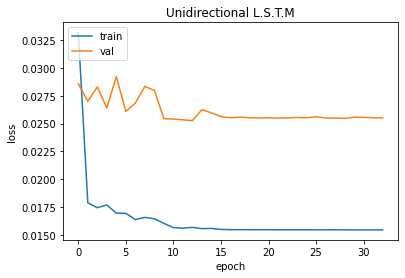

In [38]:
from matplotlib import pyplot as plt
plt.plot(history_uni.history['loss'])
plt.plot(history_uni.history['val_loss'])

plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.title('Unidirectional L.S.T.M')
plt.show()

# 2.Building the TCN model (Vector Output Model)¶

In [1]:
from utils import HouseholdDataLoader, TSF_Data

dataload = HouseholdDataLoader()
data = dataload.data_by_days

tsf = TSF_Data(data=data['Global_active_power'],
               input_width=21,
               output_width=7)

2022-06-10 14:43:41.853949: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [22]:
import tensorflow as tf
from tcn import TCN
from tensorflow.keras import Model, Sequential
from tensorflow.keras.layers import Dense, Input


input_width = tsf.data_train[0].shape[1]
num_features = 1

inputs = Input(shape=(input_width, num_features))

x1 = TCN(input_shape=(input_width, 1),
         kernel_size=3,
         nb_filters=128,
         dilations=(1, 2, 4, 8, 16, 32, 64, 128),
         use_skip_connections=True,
         use_batch_norm=True,
         use_weight_norm=False,
         use_layer_norm=False,
         return_sequences=True
         )(inputs)


x2 = TCN(kernel_size=2,
         nb_filters=64,
         dilations=(1, 2, 4, 8, 16, 32, 64),
         use_skip_connections=True,
         use_batch_norm=True,
         use_weight_norm=False,
         use_layer_norm=False,
         return_sequences=True
         )(x1)

x3 = TCN(kernel_size=2,
        nb_filters=32,
        dilations=(1, 2, 4, 8, 16, 32,),
        use_skip_connections=True,
        use_batch_norm=True,
        use_weight_norm=False,
        use_layer_norm=False
        )(x2)
         

x4 = Dense(units=tsf.data_train[1].shape[1], activation='linear')(x3)

model = Model(inputs, x4)

model.summary()
model.compile('adam', 'mse')

checkpoint_path = "CNU_1/cp.ckpt"

print('Train...')

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                  patience=10,
                                                  mode='min')

checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True,
                                                mode='min')

reduceLR = tf.keras.callbacks.ReduceLROnPlateau(factor=0.1, patience=3, min_lr=0.00001, verbose=1)
callbacks = [
    early_stopping,
    reduceLR
]

history = model.fit(x=tsf.data_train[0],
                    y=tsf.data_train[1],
                    validation_data=tsf.data_valid,
                    epochs=50,
                    callbacks=[callbacks],
                    verbose=2,
                    use_multiprocessing=True)


Model: "model_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_13 (InputLayer)       [(None, 21, 1)]           0         
                                                                 
 tcn_12 (TCN)                (None, 21, 128)           748160    
                                                                 
 tcn_13 (TCN)                (None, 21, 64)            135616    
                                                                 
 tcn_14 (TCN)                (None, 32)                30624     
                                                                 
 dense_12 (Dense)            (None, 7)                 231       
                                                                 
Total params: 914,631
Trainable params: 907,975
Non-trainable params: 6,656
_________________________________________________________________
Train...
Epoch 1/50
40/40 - 13s - loss: 1.5001 -

In [7]:
tsf.data_valid[1].shape

(117, 7)

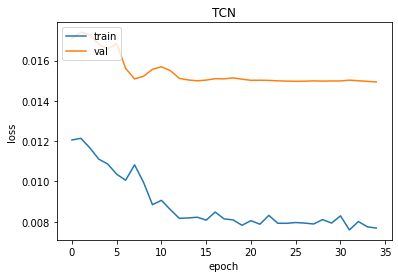

In [25]:
from matplotlib import pyplot as plt
plt.plot(history.history['loss'][15:])
plt.plot(history.history['val_loss'][15:])

plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.title('TCN')
plt.show()

# 3.Building the TCN mix with L.S.T.M model (Vector Output Model)¶

In [1]:
from utils import HouseholdDataLoader, TSF_Data

dataload = HouseholdDataLoader()
data = dataload.data_by_days

tsf = TSF_Data(data=data['Global_active_power'],
               input_width=21,
               output_width=7)

tsf.normalize_data()

2022-06-13 21:04:24.915587: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [7]:
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from keras.layers import Dense, LSTM
from keras import Sequential
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense, Input
from tcn import TCN

input_width = tsf.data_train[0].shape[1]
num_features = 1

inputs = Input(shape=(input_width, num_features))

x1 = TCN(input_shape=(input_width, 1),
         kernel_size=3,
         nb_filters=128,
         #  dilations=(1, 2, 4, 8, 16, 32, 64, 128),
         use_skip_connections=True,
         use_batch_norm=True,
         use_weight_norm=False,
         use_layer_norm=False,
         return_sequences=True
         )(inputs)

# x21 = LSTM(200, return_sequences=True)(x1)

x2 = LSTM(150)(x1)

x3 = Dense(units=tsf.data_train[1].shape[1])(x2)

model = Model(inputs, x3)

# model = Sequential()
# model.add(LSTM(200, return_sequences= True, activation='relu', input_shape=(21, 1)))
# model.add(LSTM(150))
# model.add(Dense(7))

# model = tf.keras.models.Sequential([
#     tf.keras.layers.Conv1D(filters=32, kernel_size=3,
#                            strides=1, padding="causal",
#                            activation="relu",
#                            input_shape=[21, 1]),
#     tf.keras.layers.Bidirectional(
#         tf.keras.layers.LSTM(32, return_sequences=True)),
#     # tf.keras.layers.LSTM(128),
#     tf.keras.layers.Bidirectional(
#         tf.keras.layers.LSTM(32, return_sequences=False)),
#     # tf.keras.layers.Dropout(0.1),
#     tf.keras.layers.Dense(7),
#     # tf.keras.layers.Dense(3,kernel_initializer=tf.initializers.zeros),
#     # tf.keras.layers.Lambda(lambda x: x * 200),
#     #tf.keras.layers.Reshape([24, 3])
# ])

print(model.summary())
# model.compile(optimizer='adam', loss='mse', metrics=['mse'])
model.compile(loss=tf.keras.losses.Huber(),
              optimizer='adam',
              metrics=['mse'])

# def step_decay(losses):
#     import numpy as np
#     if float(2*np.sqrt(np.array(history.losses[-1])))<0.3:
#         lrate=0.01*1/(1+0.1*len(history.losses))
#         momentum=0.8
#         decay_rate=2e-6
#         return lrate
#     else:
#         lrate=0.1
#         return lrate
# sd=[]
# class LossHistory(tf.keras.callbacks.Callback):
#     def on_train_begin(self, logs={}):
#         self.losses = [1,1]

#     def on_epoch_end(self, batch, logs={}):
#         self.losses.append(logs.get('loss'))
#         sd.append(step_decay(len(self.losses)))
#         print('lr:', step_decay(len(self.losses)))
# history=LossHistory()


# lr_schedule = tf.keras.callbacks.LearningRateScheduler(step_decay)


callbacks = [
    # history,
    EarlyStopping(patience=20, verbose=1),
    ReduceLROnPlateau(factor=0.1, patience=3, min_lr=0.00001, verbose=1),
    # lr_schedule
]

history = model.fit(x=tsf.data_train[0],
                    y=tsf.data_train[1],
                    epochs=100, validation_data=tsf.data_valid,
                    batch_size=64,
                    steps_per_epoch=100,
                    callbacks=callbacks)


Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 21, 1)]           0         
                                                                 
 tcn_3 (TCN)                 (None, 21, 128)           548992    
                                                                 
 lstm_4 (LSTM)               (None, 150)               167400    
                                                                 
 dense_3 (Dense)             (None, 7)                 1057      
                                                                 
Total params: 717,449
Trainable params: 714,377
Non-trainable params: 3,072
_________________________________________________________________
None
Epoch 1/100
100/100 [==============================] - 7s 37ms/step - loss: 0.0134 - mse: 0.0269 - val_loss: 0.0099 - val_mse: 0.0197 - lr: 0.0010
Epoch 2/100
100/100 [========

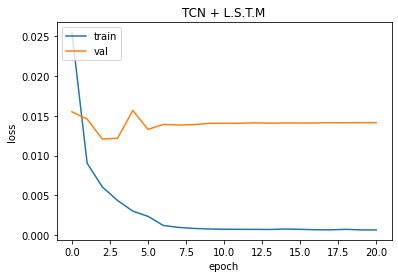

In [13]:
from matplotlib import pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.title('TCN + L.S.T.M')
plt.show()

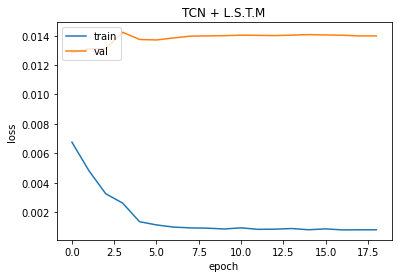

In [8]:
from matplotlib import pyplot as plt
plt.plot(history.history['mse'][2:])
plt.plot(history.history['val_mse'][2:])

plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.title('TCN + L.S.T.M')
plt.show()